## OSM Bootcamp 2018 Exercise Set 1


#### John Stachurski

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

#### Write initial functions

In [7]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

In [1]:
# Write functions used in answers
mat_txt = np.loadtxt('matrix_data.txt')

def spec_radius(mat):
    '''
    Given a np matrix, returns the spectral radius
    '''
    e_vals, e_vecs = LA.eig(mat)
    
    return np.max(e_vals)

def lsr_iter(X, v, max_i, threshold):
    '''
    Tests convergence of ||X^iv||^(1/i) to spectral radius
    '''
    
    cur_X = X
    r = spec_radius(X)
    
    for i in range(1, max_i):
        norm = LA.norm(cur_X @ v)
        
        error = np.abs(norm**(1/i) - r)
        
        if error < threshold:
            return True, i
        
        cur_X = cur_X @ X
    
    return False, i

#### ANSWER (1 and 2):

In [2]:
v = np.ones((mat_txt.shape[0], 1))
max_iters = 100000
tol = 0.001
t = lsr_iter(mat_txt, v, max_iters, tol)
print("Spectral radius of X is {}".format(spec_radius(mat_txt)))
print("Convergence is achieved after {} iterations to error of {}".format(t[1], tol))

Spectral radius of X is 1.0044277694480632
Convergence is achieved after 1202 iterations to error of 0.001


### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



#### Write initial functions

In [3]:
from numba import jit, njit, prange

@jit
def fn_x(x):
    return 4 * x * (1-x)

@jit
def sim_path(x0, time_steps, f):
    '''
    Simulates a single path starting at x0, going time_steps.
    Applies the function f
    '''
    
    path = np.empty(time_steps)
    cur_x = x0
    
    for i in range(time_steps):
        cur_x = f(cur_x)
        path[i] = cur_x
    
    return path

@jit(parallel=True)
def sim_count_paths(count, time_steps, f):
    '''
    Simulates count number of paths of length time steps.
    Applies the function f
    '''
    
    x0_vec = np.random.uniform(0, 1, count)
    all_paths = []
    
    for i in prange(count):
        cur_x0 = x0_vec[i]
        all_paths.append(sim_path(cur_x0, time_steps, f))
    
    return all_paths

    

#### ANSWER (2):

In [4]:
paths = sim_count_paths(100, 10000, fn_x)


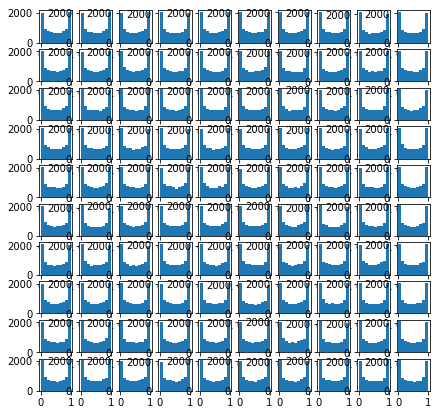

In [13]:
fig, axes = plt.subplots(10,10)
fig.set_size_inches((7,7))
for num, path in enumerate(paths):
    i = num % 10
    j = num // 10
    axes[i][j].hist(path)
    

### Exercise 3

In the lecture it was claim that, if $(\mathbb X, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb X$ and, for some $x \in \mathbb X$, $g^t(x) \to \hat x$, then $\hat x$ is a steady state of $(\mathbb X, g)$.

Prove this.

See PDF file for proofs